In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [2]:
M = 10
lr = 0.1
batch_size = 1024
prior = 1

methods = ["FO", "SO", "exact", "MC", "uniform"]
bound = "seeger"

datasets = ["MUSH", "TTT", "SVMGUIDE", "HABER", "PHIS", "CODRNA", "ADULT"]
ns = [4874+1625, 574+192, 2471+618, 183+61, 6633+2211, 35721+11907, 19536+6512]
dims = [22, 9, 4, 2, 68, 8, 123]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/binary/{d}/{m}/{bound}/optimize-bound=True/stochastic-bound=False/stumps-uniform/M={M}/")
        
        if m == "uniform":
            path = next(load_dir.rglob(f"**/prior={prior}/err-b.npy"))
        else:
            path = next(load_dir.rglob(f"**/prior={prior}/lr={lr}/batch-size={batch_size}/**/err-b.npy"))

        results[d][m] = np.load(path, allow_pickle=True).item()

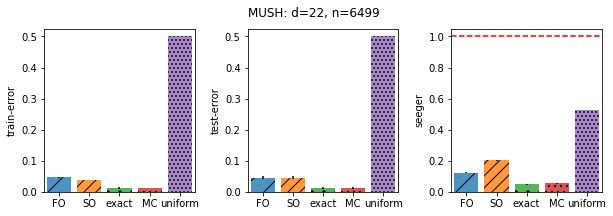

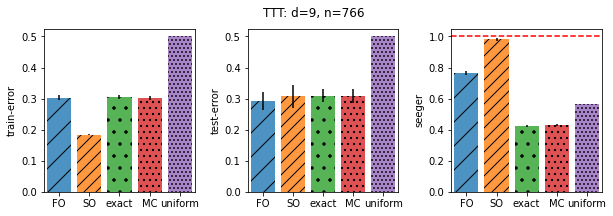

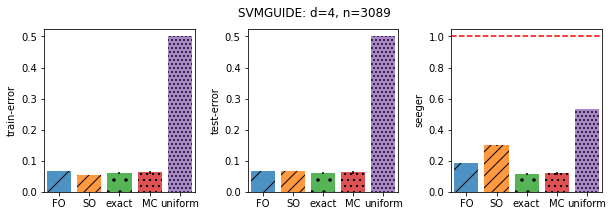

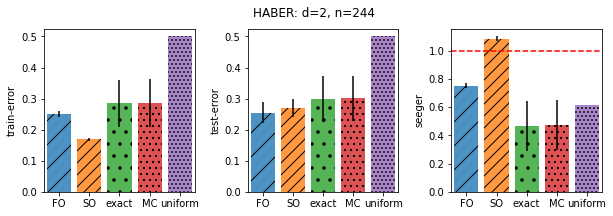

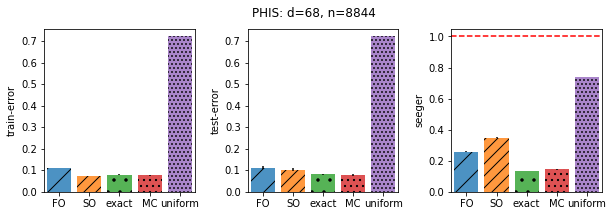

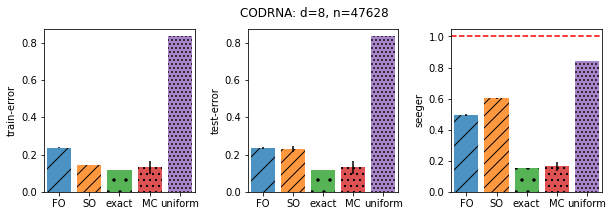

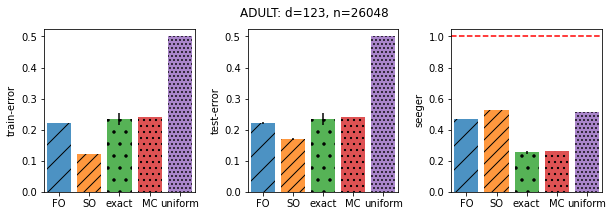

In [7]:
hatches = ["/", "//", ".", "..", "..."]
for d, s, n in zip(datasets, dims, ns):
    
    plt.figure(figsize=(10,3))
    for j, y in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)
    
        for i, (m, h) in enumerate(zip(methods, hatches)):

            plt.bar(i, results[d][m][y][0], yerr=results[d][m][y][1], label=m, alpha=0.8, hatch=h)
            plt.ylabel(y)

        if y == bound:
            plt.plot([-0.5, 4.5], [1, 1], linestyle='dashed', c="r")

        ax.set_xticks(range(5))
        ax.set_xticklabels(methods)
        plt.xlim(-0.5, 4.5)
        plt.subplots_adjust(wspace=0.35)
        
    plt.suptitle(f"{d}: d={s}, n={n}")
    plt.savefig(f"{d}.pdf", bbox_inches="tight")

In [20]:
def draw_bars(datasets):
    
    x_pos = np.linspace(0, 0.75*len(methods), len(methods))
    step = len(methods)
    
    plt.figure(figsize=(9, 6))
    b = "seeger"
    
    for i, d in enumerate(datasets):
        ax = plt.subplot(2, 4, i + 1)
        test_errors = ([results[d][m]["test-error"][0] for m in methods], [results[d][m]["test-error"][1] for m in methods])
        bounds = ([results[d][m][b][0] for m in methods], [results[d][m][b][1] for m in methods])

        plt.bar(x_pos, bounds[0], yerr=bounds[1], alpha=0.8, hatch="/", label="bound")
        plt.bar(x_pos, test_errors[0], yerr=test_errors[1], alpha=1, hatch=".", label="test error")

        plt.title(d, fontsize=15)
        plt.ylim(0, 1)
        ax.set_xticklabels(methods, fontsize=12, rotation=70)    
        ax.set_xticks(x_pos)
        
        if i % 4 != 0:
            ax.set_yticks([])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplots_adjust(wspace=0, hspace=0.7)

#     plt.savefig(f"binary-test.pdf", bbox_inches="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


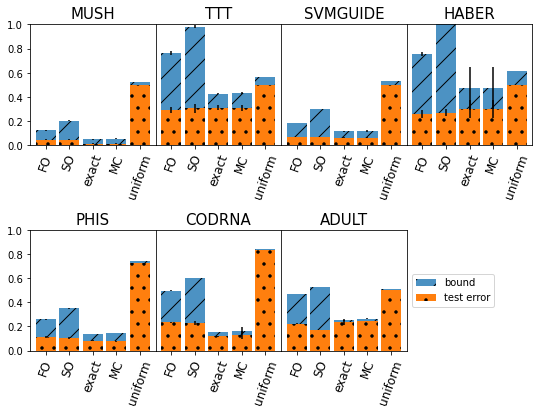

In [21]:
draw_bars(datasets)